<a href="https://colab.research.google.com/github/JustHawker/CycleGAN-Keras/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [3]:
%cd "/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2/scripts/datasets/"
!bash get_datasets.sh
%cd "/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2/"

/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2/scripts/datasets
--2020-12-14 05:19:13--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  47.8MB/s    in 3.5s    

2020-12-14 05:19:16 (46.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2


In [4]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


X_train = X_train[:2000]
y_train = y_train[:2000]
X_test = X_test[:500]
y_test = y_test[:500]

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



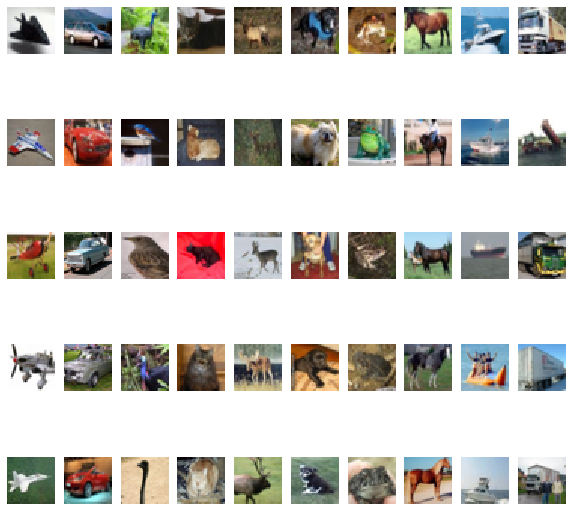

In [5]:
selected=np.zeros(10)
fig=plt.figure(figsize=(10, 10))
cols, rows = 10, 5
i=0
while selected.min()<5 :
    img = X_train[i].astype(int)
    if selected[y_train[i]]<5:
      fig.add_subplot(rows, cols, 10*selected[y_train[i]]+y_train[i]+1)
      selected[y_train[i]]+=1
      plt.imshow(img)
      plt.axis('off')
    i+=1

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [6]:
pics, w,h,c = X_train.shape
X_train = X_train.reshape((pics,w*h*c))

pics, w,h,c = X_test.shape
X_test = X_test.reshape((pics,w*h*c))


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [8]:
from scripts.classifiers import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [9]:
pred = classifier.predict(X_test, k=3)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


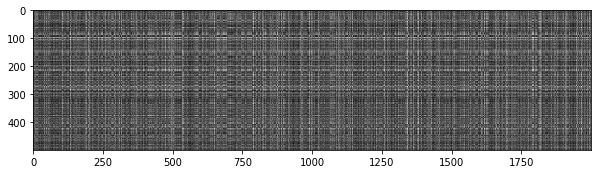

In [10]:
distances = classifier.compute_distances_no_loops(X_test)
plt.imshow(distances)


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [11]:
score = y_test[y_test == pred].size/y_test.size
score

0.24

1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

Text(0, 0.5, 'score')

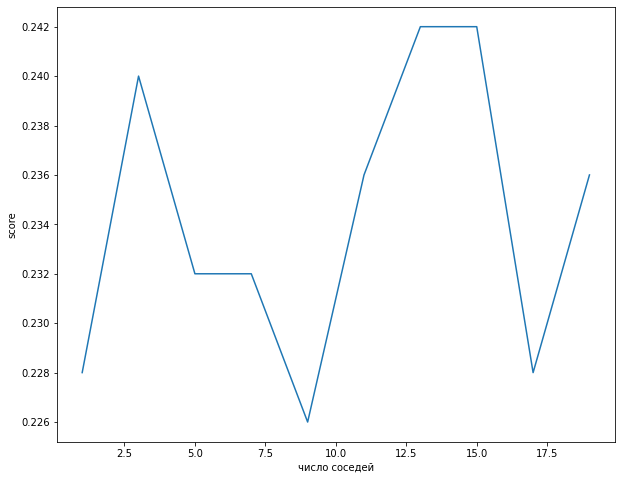

In [12]:
neighbors = list(range(1,20,2))
scores = []
for k in neighbors:
  pred = classifier.predict(X_test, k=k)
  scores.append(y_test[y_test == pred].size/y_test.size)

plt.plot(neighbors, scores)
plt.xlabel('число соседей')
plt.ylabel('score')

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [14]:
cv=5

X_folds = np.array_split(X_train, cv)
y_folds = np.array_split(y_train, cv)
scores = []

for k in neighbors:
  cv_scores=np.zeros(cv)
  for i in range(cv):
    X_train_cv = np.concatenate([ fold for j, fold in enumerate(X_folds) if i!=j])
    y_train_cv = np.concatenate([ fold for j, fold in enumerate(y_folds) if i!=j])

    # X_train_cv = np.concatenate(np.delete(X_folds.copy(),i))
    # y_train_cv = np.concatenate(np.delete(y_folds.copy(),i))
    # По идее, должно было работать это, но почему-то ломается на cv>3 O_о
    # (просто вариант со генератором списка выглядит костыльно, 
    # когда есть средстав numpy, которые почему-то не работают как надо в этом случае)

    #np.concatenate(np.delete(y_folds.copy(),i))
    classifier = KNearestNeighbor()
    classifier.train(X_train_cv, y_train_cv)
    pred = classifier.predict(X_folds[i], k=k)
    cv_scores[i] = (y_folds[i][y_folds[i] == pred].size/y_folds[i].size)
  scores.append(cv_scores.mean())
print(scores)

k_best = neighbors[np.argmax(scores)]
print('лучшее значение k = {}'.format(k_best))

[0.22949999999999998, 0.229, 0.2435, 0.2445, 0.251, 0.246, 0.24500000000000002, 0.24349999999999997, 0.233, 0.23850000000000002]
лучшее значение k = 9



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [15]:
classifier.train(X_train, y_train)
pred = classifier.predict(X_test, k=k_best)
score = y_test[y_test == pred].size/y_test.size
score

0.226

1.11 Сделайте выводы по результатам 1 части задания.

Метод к-ближайших соседей показал неудовлетворительные результаты, что можно объяснить недостаточным набором гиперпараметров сети (всего один)

## 2.  Классификация данных методом опорных векторов (SVM)


2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [16]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'


try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_train = X_train[:2000]
y_train = y_train[:2000]
X_test = X_test[:500]
y_test = y_test[:500]

pics, w,h,c = X_train.shape
X_train = X_train.reshape((pics,w*h*c))

pics, w,h,c = X_test.shape
X_test = X_test.reshape((pics,w*h*c))

pics, _ = X_train.shape
rel = 0.9

splited = np.split(X_train, [int(pics*rel)])
X_train = splited[0]
X_val = splited[1]

splited = np.split(y_train, [int(pics*rel)])
y_train = splited[0]
y_val = splited[1]

print('размерность обучающей выборки: {}'.format(X_train.shape))
print('размерность тестовой выборки: {}'.format(X_test.shape))
print('размерность валидационной выборки: {}'.format(X_val.shape))

Clear previously loaded data.
размерность обучающей выборки: (1800, 3072)
размерность тестовой выборки: (500, 3072)
размерность валидационной выборки: (200, 3072)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[133.36111111 138.53611111 135.39333333 132.75777778 137.89777778
 134.76055556 133.63944444 138.60222222 135.38833333 134.12388889]


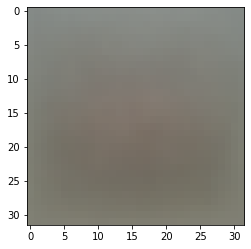

(1800, 3073) (200, 3073) (500, 3073)


In [17]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [18]:
import importlib
import scripts

X_dev, y_dev = X_train[:10], y_train[:10]

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 11.860576


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [19]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -35.800000 analytic: -35.800000, relative error: 4.225546e-13
numerical: -5.700000 analytic: -5.700000, relative error: 7.560580e-12
numerical: 13.800000 analytic: 13.800000, relative error: 9.079372e-13
numerical: -148.943333 analytic: -148.943333, relative error: 8.052701e-13
numerical: 41.400000 analytic: 41.400000, relative error: 1.237357e-12
numerical: -9.232778 analytic: -9.232778, relative error: 4.745563e-12
numerical: 13.100000 analytic: 13.100000, relative error: 2.089050e-12
numerical: 73.900000 analytic: 73.900000, relative error: 4.201721e-13
numerical: -11.771111 analytic: -11.771111, relative error: 5.061913e-12
numerical: 41.100000 analytic: 41.100000, relative error: 1.424630e-12
numerical: 23.202570 analytic: 23.202570, relative error: 1.774782e-12
numerical: -105.911749 analytic: -105.911749, relative error: 8.510808e-13
numerical: -92.862954 analytic: -92.862954, relative error: 4.132586e-13
numerical: 75.275127 analytic: 75.275127, relative error: 2.852

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [20]:
#from scripts.classifiers.linear_svm import svm_loss_vectorized

tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()

_, grad_vectorized = scripts.classifiers.linear_svm.svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.012226s
Vectorized loss and gradient: computed in 0.002615s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [21]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4, num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 1581.663474
iteration 100 / 1500: loss 945.257620
iteration 200 / 1500: loss 570.249123
iteration 300 / 1500: loss 346.655801
iteration 400 / 1500: loss 210.838045
iteration 500 / 1500: loss 129.767825
iteration 600 / 1500: loss 80.335962
iteration 700 / 1500: loss 51.353693
iteration 800 / 1500: loss 33.201035
iteration 900 / 1500: loss 22.586541
iteration 1000 / 1500: loss 16.149417
iteration 1100 / 1500: loss 11.952755
iteration 1200 / 1500: loss 9.717922
iteration 1300 / 1500: loss 8.080170
iteration 1400 / 1500: loss 7.394462
That took 7.644015s


In [22]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.541667
validation accuracy: 0.425000


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [24]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

cv=5
scores = []
X_val

X_folds = np.array_split(np.concatenate([X_train, X_val]), cv)
y_folds = np.array_split(np.concatenate([y_train, y_val]), cv)

best_params = (learning_rates[0],regularization_strengths[0])
best_score = 0

for lr in learning_rates:
  for reg in regularization_strengths:
    cv_scores=np.zeros(cv)
    for i in range(cv):
      X_train_cv = np.concatenate([ fold for j, fold in enumerate(X_folds) if i!=j])
      y_train_cv = np.concatenate([ fold for j, fold in enumerate(y_folds) if i!=j])

      classifier = svm = LinearSVM()
      classifier.train(X_train_cv, y_train_cv, learning_rate=lr, reg=reg, num_iters=1500, verbose=False)

      pred = classifier.predict(X_folds[i])
      cv_scores[i] = (y_folds[i][y_folds[i] == pred].size/y_folds[i].size)
    if cv_scores.mean() > best_score:
      best_score = cv_scores.mean() 
      best_params = (lr, reg)
print(best_score)
print(best_params)


/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2/scripts/classifiers/linear_svm.py:98: RuntimeWarning: overflow encountered in double_scalars
  loss += 2 * reg * np.sum(W * W)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/drive/My Drive/NNlabs/DL_Course_SamU/lab_1-2/scripts/classifiers/linear_svm.py:98: RuntimeWarning: overflow encountered in multiply
  loss += 2 * reg * np.sum(W * W)


0.352
(1e-07, 50000.0)


In [25]:
best_lr, best_reg = best_params

classifier = svm = LinearSVM()
classifier.train(X_train_cv, y_train_cv, learning_rate=best_lr, reg=best_reg, num_iters=1500, verbose=False)

pred = classifier.predict(X_test)

score = y_test[y_test == pred].size/y_test.size
score


0.336

2.9 Сделайте выводы по второй части задания

Векторизация сильно успорила вычислительный процесс, а метод опорный векторов вкупе со стохастическим градиентным спуском позволили увеличить score в ~1.5 раза. Причём имеется возможность улучшить результат, увеличив число итераций выбора minibatch'a

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [ ]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [ ]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

3.10 Сделайте выводы по третьей части задания